# Titanic Survival Rate Predictions

### Importing packages

In [142]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


### Explorating Data

In [143]:
# Importing data csv as pandas df.
raw_train = pd.read_csv('train.csv',index_col=0)
raw_test = pd.read_csv('test.csv',index_col=0)

In [144]:
# General overview of the data
raw_train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [145]:
# General information.
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [146]:
# Null values. Seems like we'll have some null values to handle in Age, Cabin, Fare and Embarked.
print(raw_train.isnull().sum())
print(raw_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [147]:
raw_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
# There are no duplicates in out datasets.
dup_train = raw_train.duplicated().any()
dup_test = raw_test.duplicated().any()
print(dup_train)
print(dup_test)

False
False


In [149]:
# Splitting out master train file into train and valid 80/20 in order to be able to measure performance.
x = raw_train.drop(["Survived"],axis=1)
y = raw_train["Survived"]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=6)

### Data cleaning

In [150]:
# We'll replace NaN values for Age, Fare and Embarked. Cabin has too many NaN to be useful in our models.
# Where applicable, we'll always use the same values calculated for train in test. To avoid leakage.

x_train["Age"] = x_train["Age"].fillna(x_train["Age"].median())
x_valid["Age"] = x_valid["Age"].fillna(x_train["Age"].median())
raw_test["Age"] = raw_test["Age"].fillna(x_train["Age"].median())

x_train["Embarked"] = x_train["Embarked"].fillna(x_train["Embarked"].mode()[0])
x_valid["Embarked"] = x_valid["Embarked"].fillna(x_train["Embarked"].mode()[0])
raw_test["Embarked"] = raw_test["Embarked"].fillna(x_train["Embarked"].mode()[0])

x_train["Fare"] = x_train["Fare"].fillna(x_train["Fare"].mean())
x_valid["Fare"] = x_valid["Fare"].fillna(x_train["Fare"].mean())
raw_test["Fare"] = raw_test["Fare"].fillna(x_train["Fare"].mean())

x_train['Cabin'].fillna('Missing', inplace=True)
x_valid['Cabin'].fillna('Missing', inplace=True)
raw_test['Cabin'].fillna('Missing', inplace=True)

In [151]:
print(x_train.isnull().sum())
print(x_valid.isnull().sum())
print(raw_test.isnull().sum())

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [152]:
print(x_train.head(10))


             Pclass                                             Name     Sex  \
PassengerId                                                                    
742               1                    Cavendish, Mr. Tyrell William    male   
578               1        Silvey, Mrs. William Baird (Alice Munger)  female   
811               3                           Alexander, Mr. William    male   
300               1  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female   
656               2                        Hickman, Mr. Leonard Mark    male   
580               3                              Jussila, Mr. Eiriik    male   
733               2                             Knight, Mr. Robert J    male   
636               2                                Davis, Miss. Mary  female   
375               3                       Palsson, Miss. Stina Viola  female   
123               2                             Nasser, Mr. Nicholas    male   

              Age  SibSp  Parch        

In [153]:
#Creating the label encoder
encoder_c = LabelEncoder()
encoder_e = LabelEncoder()

#Fitting the encoder on the raw_train['Cabin'] column
encoder_c.fit(pd.concat([x_train['Cabin'], x_valid['Cabin'], raw_test['Cabin']]))
encoder_e.fit(x_train['Embarked'])

#Transforming the x_train['Cabin'], x_valid['Cabin'] and raw_test['Cabin'] columns using the fitted encoder
x_train['Cabin'] = encoder_c.transform(x_train['Cabin'])
x_valid['Cabin'] = encoder_c.transform(x_valid['Cabin'])
raw_test['Cabin'] = encoder_c.transform(raw_test['Cabin'])

x_train['Embarked'] = encoder_e.transform(x_train['Embarked'])
x_valid['Embarked'] = encoder_e.transform(x_valid['Embarked'])
raw_test['Embarked'] = encoder_e.transform(raw_test['Embarked'])
x_train.head(50)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
742,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,87,2
578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,161,2
811,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,185,2
300,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,48,0
656,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,185,2
580,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,185,2
733,2,"Knight, Mr. Robert J",male,28.0,0,0,239855,0.0000,185,2
636,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,185,2
375,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,185,2


In [154]:
# Dictionary for numerical conversion of column sex
factors = {'male': 0, 'female': 1}

# Applying the same conversion to all df
x_train['Sex'] = x_train['Sex'].map(factors)
x_valid['Sex'] = x_valid['Sex'].map(factors)
raw_test['Sex'] = raw_test['Sex'].map(factors)

In [155]:
# Creating one variable for SibSp and Parch.
x_train['fsize'] = x_train['SibSp'] + x_train['Parch']
x_valid['fsize'] = x_valid['SibSp'] + x_valid['Parch']
raw_test['fsize'] = raw_test['SibSp'] + raw_test['Parch']

# Creating Fare per person
x_train['farepp'] = x_train['Fare'] / (x_train['fsize'] + 1)
x_valid['farepp'] = x_valid['Fare'] / (x_valid['fsize'] + 1)
raw_test['farepp'] = raw_test['Fare'] / (raw_test['fsize'] + 1)

x_train["Title"] = x_train["Name"].str.extract("([A-Za-z]+\.)", expand=False)     
x_valid["Title"] = x_valid["Name"].str.extract("([A-Za-z]+\.)", expand=False)  
raw_test["Title"] = raw_test["Name"].str.extract("([A-Za-z]+\.)", expand=False)  

# Getting the unique values of the column
unique_titles = pd.concat((x_train['Title'], x_valid['Title'], raw_test['Title'])).drop_duplicates()
unique_titles.head(10)

# Dictionary for numerical conversion of column sex
factors_title = {'Mr.': 0, 'Mrs.': 1, 'Miss.': 2, 'Rev.': 3, 'Master.': 4, 'Capt.': 5, 'Lady.': 6, 'Col.': 7, 'Dr.': 8, 'Don.': 9}

# Applying the same conversion to all df
x_train['Title'] = x_train['Title'].map(factors_title)
x_valid['Title'] = x_valid['Title'].map(factors_title)
raw_test['Title'] = raw_test['Title'].map(factors_title)

x_train['Title'].fillna(-1, inplace=True)
x_valid['Title'].fillna(-1, inplace=True)
raw_test['Title'].fillna(-1, inplace=True)

x_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fsize,farepp,Title
PassengerId,,,,,,,,,,,,,
742,1,"Cavendish, Mr. Tyrell William",0,36.0,1,0,19877,78.8500,87,2,1,39.4250,0.0
578,1,"Silvey, Mrs. William Baird (Alice Munger)",1,39.0,1,0,13507,55.9000,161,2,1,27.9500,1.0
811,3,"Alexander, Mr. William",0,26.0,0,0,3474,7.8875,185,2,0,7.8875,0.0
300,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,50.0,0,1,PC 17558,247.5208,48,0,1,123.7604,1.0
656,2,"Hickman, Mr. Leonard Mark",0,24.0,2,0,S.O.C. 14879,73.5000,185,2,2,24.5000,0.0


In [156]:
print(x_train.isnull().sum())
print(x_valid.isnull().sum())
print(raw_test.isnull().sum())

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
fsize       0
farepp      0
Title       0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
fsize       0
farepp      0
Title       0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
fsize       0
farepp      0
Title       0
dtype: int64


In [157]:
# Preparing files before starting to fit ML models to the data
x_train = x_train.drop(['Name', 'Ticket', 'Cabin','SibSp', 'Parch','Fare'], axis=1)
x_valid = x_valid.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare'], axis=1)
clean_test = raw_test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare'], axis=1)

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

x_train = normalize(x_train)
x_valid = normalize(x_valid)

print(x_train.head(30))

### Decision Tree

In [158]:
dtree = DecisionTreeClassifier(random_state=6, max_depth=5, min_samples_split=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=6)

In [159]:
predictions_tree = dtree.predict(x_valid)

In [160]:
# Comparaison performance train vs valid
print('Training set score: {:.4f}'.format(dtree.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dtree.score(x_valid, y_valid)))

Training set score: 0.8638
Test set score: 0.8324


In [161]:
# Classification report
print(classification_report(y_valid,predictions_tree))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       113
           1       0.82      0.70      0.75        66

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



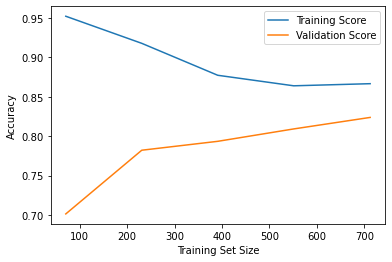

In [162]:
# Learning curve Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X = pd.concat([x_train, x_valid], ignore_index=True)
Y = pd.concat([y_train, y_valid], ignore_index=True)

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(dtree, X, Y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [163]:
print(y_train.head())

PassengerId
742    0
578    1
811    0
300    1
656    0
Name: Survived, dtype: int64


### Random Forest

In [164]:
rfc = RandomForestClassifier(n_estimators=150, random_state=6)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=6)

In [165]:
predictions_rfc = rfc.predict(x_valid)

In [166]:
# Classification report
print(classification_report(y_valid,predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       113
           1       0.77      0.76      0.76        66

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [167]:
# Comparaison performance train vs valid
print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(x_valid, y_valid)))

Training set score: 0.9860
Test set score: 0.8268


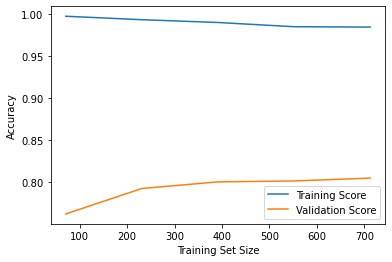

In [168]:
# Learning curve Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(rfc, X, Y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Boosting

In [169]:
boost = AdaBoostClassifier(n_estimators=100, random_state=6)
boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=6)

In [170]:
predictions_boost = boost.predict(x_valid)

In [171]:
print('Training set score: {:.4f}'.format(boost.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(boost.score(x_valid, y_valid)))

Training set score: 0.8539
Test set score: 0.8547


In [172]:
print(classification_report(y_valid,predictions_boost))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       113
           1       0.83      0.76      0.79        66

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



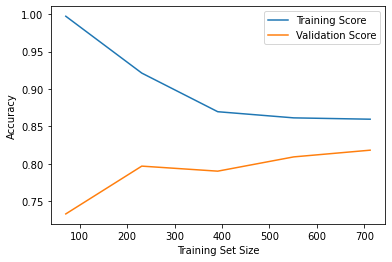

In [173]:
# Learning curve Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(boost, X, Y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Light GBM

In [174]:
ltgbm = lgb.LGBMClassifier(n_estimators=50, num_leaves=95, random_state=6)
ltgbm.fit(x_train, y_train)

LGBMClassifier(n_estimators=50, num_leaves=95, random_state=6)

In [175]:
predictions_ltgbm = ltgbm.predict(x_valid)

In [176]:
print('Training set score: {:.4f}'.format(ltgbm.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(ltgbm.score(x_valid, y_valid)))

Training set score: 0.9087
Test set score: 0.8715


In [177]:
print(classification_report(y_valid,predictions_ltgbm))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       113
           1       0.86      0.77      0.82        66

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



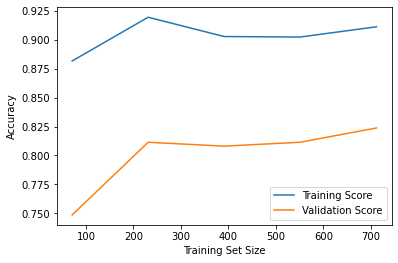

In [178]:
# Learning curve Tree

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(ltgbm, X, Y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Applying model on test dataset for submission

In [179]:
predictions_test_boost = boost.predict(clean_test)

In [180]:
final_predictions = pd.DataFrame({'Survived': predictions_test_boost}, index=clean_test.index)
final_predictions

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [181]:
final_predictions.to_csv('survival_submission.csv')